In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import h5py

dname = '/home/kmatsuno/ShearLayerData/production/Mc12/rr1/256x384x128/'
flist = glob.glob(dname+'restart_means*.h5')
flist = sorted(flist)

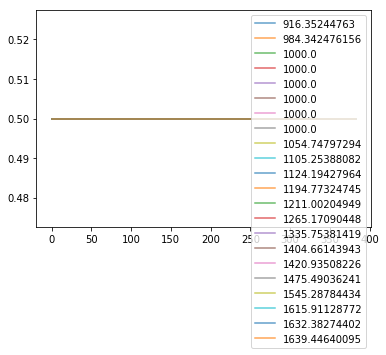

In [147]:

for fname in flist[::]:
    hf = h5py.File(fname,'r')
    attrs = hf.attrs
    t = float(attrs['Time'])
    q = np.array(hf['rhoY_0002'])

    if t>900.0: plt.plot(q,alpha=0.7,label=t)

plt.legend()

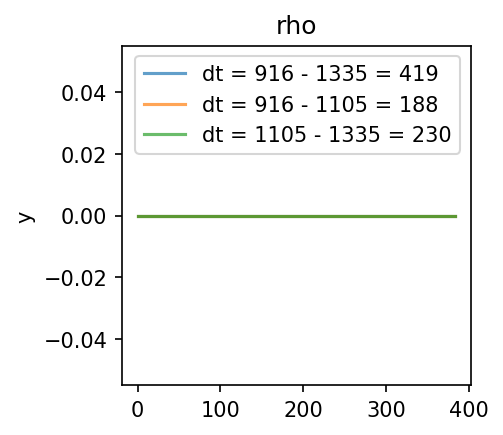

In [29]:
def smooth(f,nmode,periodic=False):
    if periodic:
        fhat = np.fft.fft(f)
        fhat[nmode:-nmode] = 0
        return np.fft.ifft(fhat)
    else: # make periodic first
        n = np.size(f)
        F = np.zeros(n*2)
        F[:n] = f
        F[-n:] = f[::-1]
        Fhat = np.fft.fft(F)
        Fhat[nmode:-nmode] = 0
        F = np.fft.ifft(Fhat)
        return np.real(F[:n])

def get_q(qname,id1,ax=None,qtype='conservative'):
    fname = '/home/kmatsuno/ShearLayerData/production/Mc12/rr1/256x384x128/restart_means_%04d.h5'%int(id1)
    hf1 = h5py.File(fname,'r')
    attrs = hf1.attrs
    t1 = float(attrs['Time'])
    if qname is 'rho':
        r1 = np.array(hf1['rhoY_0001'])
        r2 = np.array(hf1['rhoY_0002'])
        q1 = r1+r2
    else: q1 = np.array(hf1[qname])
    
    if qtype is 'primitive' and qname is not 'rho':
        r1 = np.array(hf1['rhoY_0001'])
        r2 = np.array(hf1['rhoY_0002'])
        r = r1+r2
        q1 /= r
    hf1.close()
    
    nmode = 10
    q1 = smooth(q1,nmode)
    
    if ax is not None: 
        ax.plot(q1,alpha=0.7,label="t = {}".format(int(t1)))
    return q1,t1      

def get_dqdt(qname,id1,id2,ax=None,qtype='conservative'):
    fname = '/home/kmatsuno/ShearLayerData/production/Mc12/rr1/256x384x128/restart_means_%04d.h5'%int(id1)
    hf1 = h5py.File(fname,'r')
    attrs = hf1.attrs
    t1 = float(attrs['Time'])
    if qname is 'rho':
        r1 = np.array(hf1['rhoY_0001'])
        r2 = np.array(hf1['rhoY_0002'])
        q1 = r1+r2
    else: q1 = np.array(hf1[qname])
    
    if qtype is 'primitive' and qname is not 'rho':
        r1 = np.array(hf1['rhoY_0001'])
        r2 = np.array(hf1['rhoY_0002'])
        r = r1+r2
        q1 /= r
    hf1.close()
    
    fname = '/home/kmatsuno/ShearLayerData/production/Mc12/rr1/256x384x128/restart_means_%04d.h5'%int(id2)
    hf1 = h5py.File(fname,'r')
    attrs = hf1.attrs
    t2 = float(attrs['Time'])
    if qname is 'rho':
        r1 = np.array(hf1['rhoY_0001'])
        r2 = np.array(hf1['rhoY_0002'])
        q2 = r1+r2
    else: q2 = np.array(hf1[qname])
    
    if qtype is 'primitive' and qname is not 'rho':
        r1 = np.array(hf1['rhoY_0001'])
        r2 = np.array(hf1['rhoY_0002'])
        r = r1+r2
        q2 /= r
    hf1.close()
    
    nmode = 10
    q1 = smooth(q1,nmode)
    q2 = smooth(q2,nmode)
    dqdt = (q1-q2)/(t1-t2)
    
    if ax is not None: 
        ax.plot(dqdt,alpha=0.7,label="dt = {} - {} = {}".format(int(t1),int(t2),int(t2-t1)))
    return dqdt,t1,t2

plt.figure(figsize=(3,3),dpi=150)
ax=plt.gca()
qname = 'rho'
dqdt,t1,t2 = get_dqdt(qname,12,26,ax=ax)
dqdt,t1,t2 = get_dqdt(qname,12,21,ax=ax)
dqdt,t1,t2 = get_dqdt(qname,21,26,ax=ax)
plt.title(qname)
plt.ylabel('y')
plt.legend()

In [31]:
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(8,6),dpi=150)
qlist = ['rhoY_0001','rhoY_0002','rho','rhou','rhov','rhow','TE']
plist = ['Y_1','Y_2','\rho','u','v','w','e']
for i, ax in enumerate(fig.axes):
    qname = qlist[i]
    dqdt,t1,t2 = get_dqdt(qname,12,26,ax=ax)
    dqdt,t1,t2 = get_dqdt(qname,12,22,ax=ax)
    dqdt,t1,t2 = get_dqdt(qname,22,26,ax=ax)
    ax.set_ylabel(r"$\rho\tilde{}$".format(plist[i]))
plt.legend()  
plt.subplots_adjust(wspace=0.5)

Error in callback <function post_execute at 0x7fe911ba2398> (for post_execute):


ValueError: 
$\rho\tildeho$
^
Expected end of text (at char 0), (line:1, col:1)

ValueError: 
$\rho\tildeho$
^
Expected end of text (at char 0), (line:1, col:1)

<Figure size 1200x900 with 6 Axes>

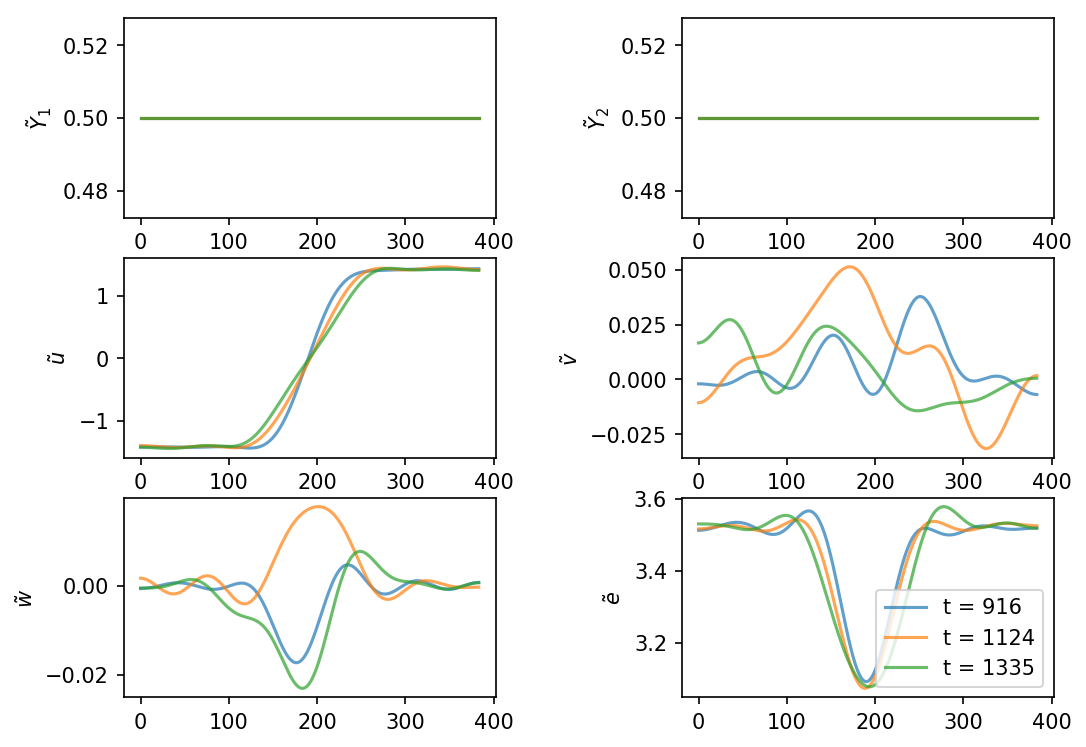

In [156]:
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(8,6),dpi=150)
qlist = ['rhoY_0001','rhoY_0002','rhou','rhov','rhow','TE']
plist = ['Y_1','Y_2','u','v','w','e']
for i, ax in enumerate(fig.axes):
    qname = qlist[i]
    q,t1 = get_q(qname,12,ax=ax)
    q,t1 = get_q(qname,22,ax=ax)
    q,t1 = get_q(qname,26,ax=ax)
    ax.set_ylabel(r"$\tilde{}$".format(plist[i]))
plt.legend()  
plt.subplots_adjust(wspace=0.5)

In [37]:
#Write to file
fname = dname + 'profiles1D_256x384x128.dat'

qlist = ['rhoY_0001','rhoY_0002','rho','rhou','rhov','rhow','TE']
nq = len(qlist)
profiles1D = np.zeros([384,3*nq])


# [Y1,Y2,u,v,w,e]
# d/dxi[Y1,Y2,u,v,w,e]
# d/dxi[rY1,rY2,ru,rv,rw,TE]
for i,qname in enumerate(qlist):
    print("{}: {},{},{}".format(qname,i,i+nq,i+nq*2) )
    q,t1 = get_q(qname,12,qtype='primitive')
    profiles1D[:,i] = q
    
    q,t1,t2 = get_dqdt(qname,12,26,qtype='primitive')
    profiles1D[:,i+nq] = q
    
    q,t1,t2 = get_dqdt(qname,12,26)
    profiles1D[:,i+nq*2] = q

np.savetxt(fname, profiles1D, delimiter=' ')
print(fname)


rhoY_0001: 0,7,14
rhoY_0002: 1,8,15
rho: 2,9,16
rhou: 3,10,17
rhov: 4,11,18
rhow: 5,12,19
TE: 6,13,20
/home/kmatsuno/ShearLayerData/production/Mc12/rr1/256x384x128/profiles1D_256x384x128.dat


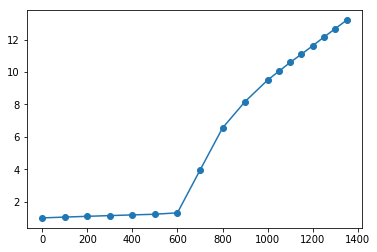

In [154]:
dat = np.fromfile(dname+'shearlayer_growth.dat',sep=' ')
t = dat[0::3]
dtheta = dat[1::3]
    q,t1 = get_q(qname,12,ax=ax)

idx = np.argsort(t)
plt.plot(t[idx],dtheta[idx],'-o')